# 데이터 가져오기 

train.csv데이터를 train 변수로가져오기

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/아이펠csv/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/아이펠csv/test (1).csv')
submission = pd.read_csv('/content/drive/MyDrive/아이펠csv/sampleSubmission.csv')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
print(train['datetime'][100])

2011-01-05 09:00:00


# datetime column을 datetime자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기


In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train['year'] = train['datetime'].dt.strftime('%Y')
train['month'] = train['datetime'].dt.strftime('%m')
train['day'] = train['datetime'].dt.strftime('%d')
train['hour'] = train['datetime'].dt.strftime('%H')
train['minute'] = train['datetime'].dt.strftime('%M')
train['second'] = train['datetime'].dt.strftime('%s')

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,00,1293840000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,00,1293843600
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,00,1293847200
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,00,1293850800
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,00,1293854400


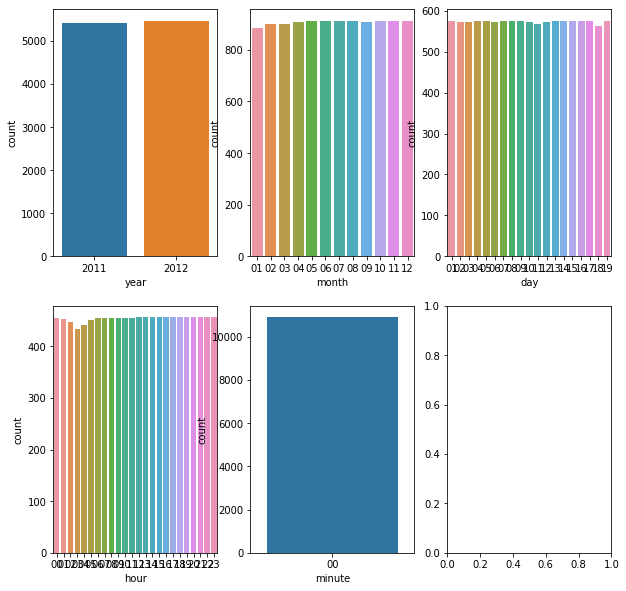

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



fig, axes =plt.subplots(2 ,3, figsize=(10,10))


sns.countplot(x='year', data=train, ax=axes[0][0])
sns.countplot(x='month', data=train, ax=axes[0][1])
sns.countplot(x='day', data=train, ax=axes[0][2])
sns.countplot(x='hour', data=train, ax=axes[1][0])
sns.countplot(x='minute', data=train, ax=axes[1][1])
#sns.countplot(x='second', data=train, ax=axes[1][2])

second 값이 너무크고 일단 y축 count가 매우 문제임 y축에 count 컬럼에 데이터를 넣어야겠음

뭐 어떻게 해야할지 머리가 터질뻔함

# (4) X, y 컬럼 선택 및 train/test 데이터 분리

뺄껀 빼야겠음



In [ ]:
train = train.drop(['datetime', 'minute', 'second','casual','registered'], axis=1)
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,01,01,00
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,01,01,01
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,01,01,02
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,01,01,03
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [ ]:
y_train = train['count'].values
X_train = train.drop('count', axis=1).values

print(X_train.shape, y_train.shape)

(10886, 12) (10886,)


test 데이터도 가져오기

In [ ]:
train_test = pd.read_csv('/content/drive/MyDrive/아이펠csv/test (1).csv')

train_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:


train_test['datetime'] = pd.to_datetime(train_test['datetime'])
train_test['year'] = train_test['datetime'].dt.strftime('%Y')
train_test['month'] = train_test['datetime'].dt.strftime('%m')
train_test['hour'] = train_test['datetime'].dt.strftime('%H')
train_test = train_test.drop(['datetime'], axis=1)
y_test= train_test['count'].values
X_test= train_test.drop('count', axis=1).values

KeyError: ignored

count가 또 문제군요 여기서 또 어떻게 해야할지 모르겠슴
재민님이  train set을 다시 train, test 셋으로 나누는 sklearn.model_seletcion train_test_split 함수를 사용 하라고 함

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,
random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708,)
(2178, 12) (2178,)


# LinearRegression 모델 학습
# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

[168.26205556 302.92615437 358.45764734 ... 348.56975008 232.28209306
 -47.44043807]


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("mse  : %d\nrmse : %d" % (mse, rmse))

mse  : 20073
rmse : 141


# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [ ]:
print(list(train.columns).index('temp'))
print(list(train.columns).index('humidity'))

4
6


TypeError: ignored

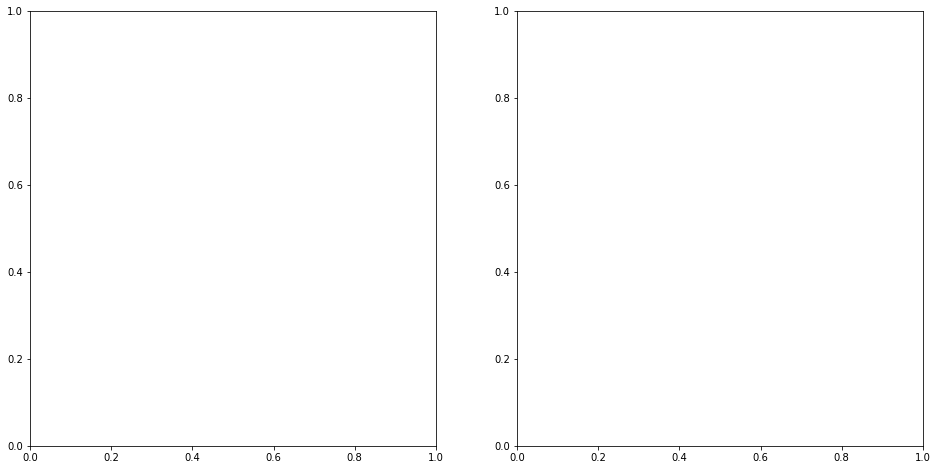

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(X_test[:, 4], y_test, label="true", ax=axes[0][0])
sns.scatterplot(X_test[:, 4], predictions, label="pred", ax=axes[0][1])

또 에러가 나자 재민님 에게 물어보니
sns.scatterplot은 pandas의 dataframe을 넣어야 제대로 작동하는 것 같다 라고 말했다

새로운 DataFrame을 만들고 거기에 X_test의 4, 6번째 열에 상대온도, 습도로 넣고 y_test와 precdictions 을 각각 넣어 주라고 했다

In [ ]:
_dict = {"temp": X_test[:, 4], "humidity": X_test[:, 6], "y_test": y_test,
 "pred": predictions}

In [ ]:
df = pd.DataFrame(_dict)

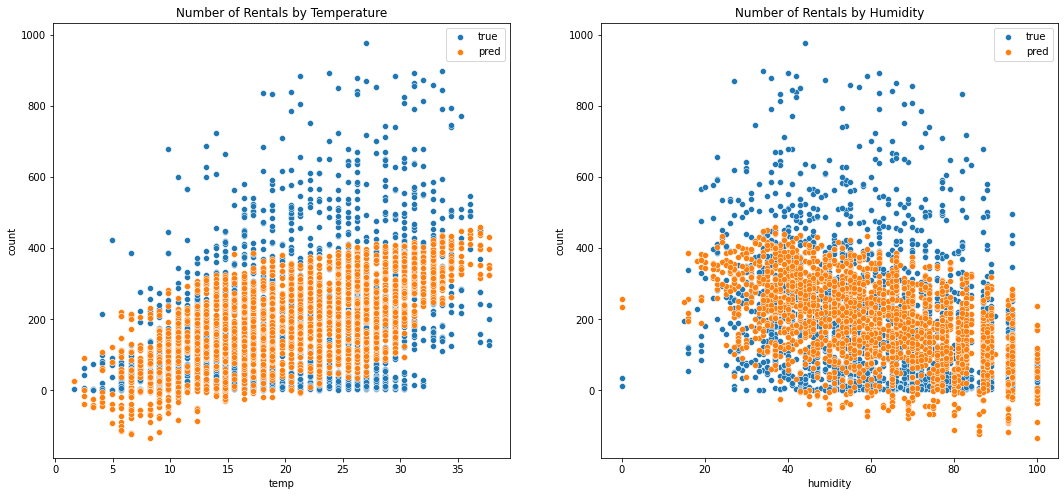

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (18 ,8))


sns.scatterplot(data=df, x='temp', y='y_test', ax=axes[0])
sns.scatterplot(data=df, x='temp', y='pred', ax=axes[0])
axes[0].set_ylabel('count')
axes[0].legend(labels=["true", "pred"])
axes[0].set_title("Number of Rentals by Temperature")

sns.scatterplot(data=df, x='humidity', y='y_test', ax=axes[1])
sns.scatterplot(data=df, x='humidity', y='pred', ax=axes[1])
axes[1].set_ylabel('count')
axes[1].legend(labels=["true", "pred"])
axes[1].set_title("Number of Rentals by Humidity")

plt.show()

# 회고

bike 이 노드는 굉장히 어려웠습니다 
다들 잘하는게 신기 할 따름이었고
재민님의 도움이 없었더라면 엉첨 힘들었을겁니다.

앞으론 검색해서 찾는 습관을 길러야겠고
많이 부족한 코드라고 느꼈습니다.